# XYZ Rotation Usage Notebook

*Note: xyzrotation is only dependent on `numpy` and `opencv` and any other package imported in this notebook is just for demonstration purposes.*

## 2D Image Rotation in 3D Space

In [1]:
import numpy as np
from PIL import Image
from xyzrotation import rotate_image

Original Image:

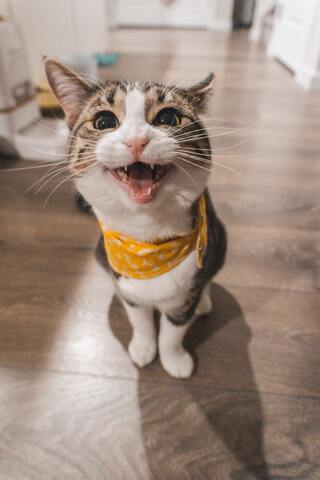

In [2]:
image = Image.open("assets/cat.jpg")
image

Rotation along X axis:

x_rotation=45


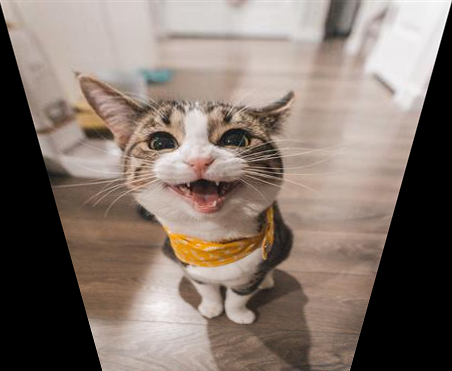

x_rotation=-45


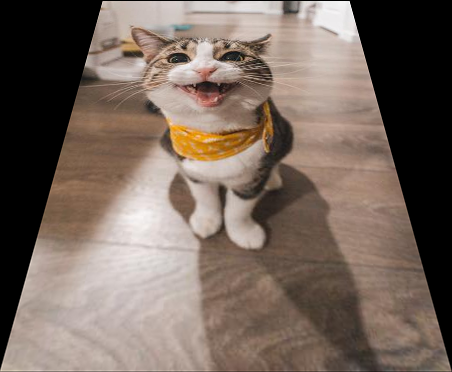

In [3]:
result = rotate_image(
    np.asarray(image),
    x_rotation=45,
    y_rotation=0,
    z_rotation=0,
)
print("x_rotation=45")
display(Image.fromarray(result))

result = rotate_image(
    np.asarray(image),
    x_rotation=-45,
    y_rotation=0,
    z_rotation=0,
)
print("x_rotation=-45")
display(Image.fromarray(result))

Rotation along Y axis:

y_rotation=45


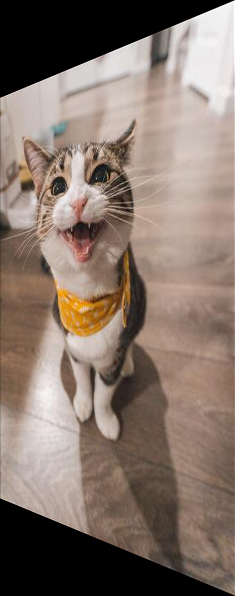

y_rotation=-45


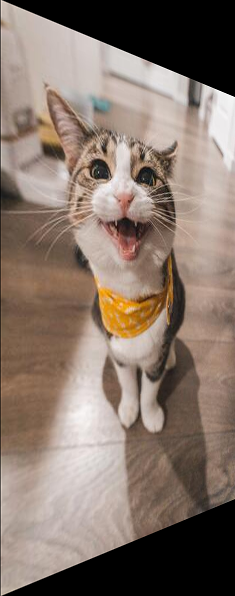

In [4]:
result = rotate_image(
    np.asarray(image),
    x_rotation=0,
    y_rotation=45,
    z_rotation=0,
)
print("y_rotation=45")
display(Image.fromarray(result))

result = rotate_image(
    np.asarray(image),
    x_rotation=0,
    y_rotation=-45,
    z_rotation=0,
)
print("y_rotation=-45")
display(Image.fromarray(result))

Rotation along Z axis:

z_rotation=45


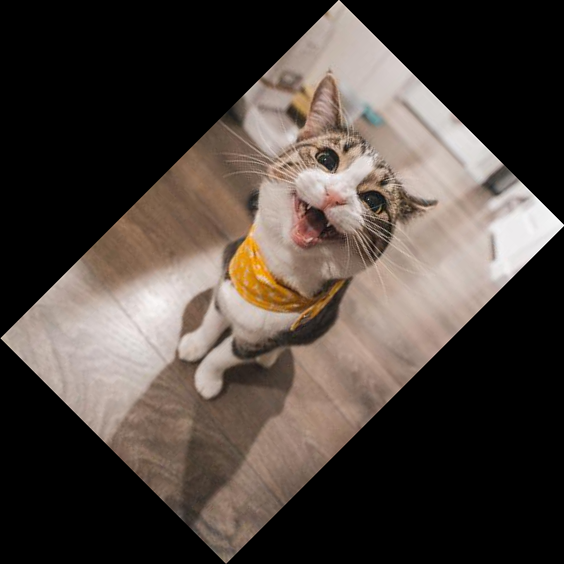

z_rotation=-45


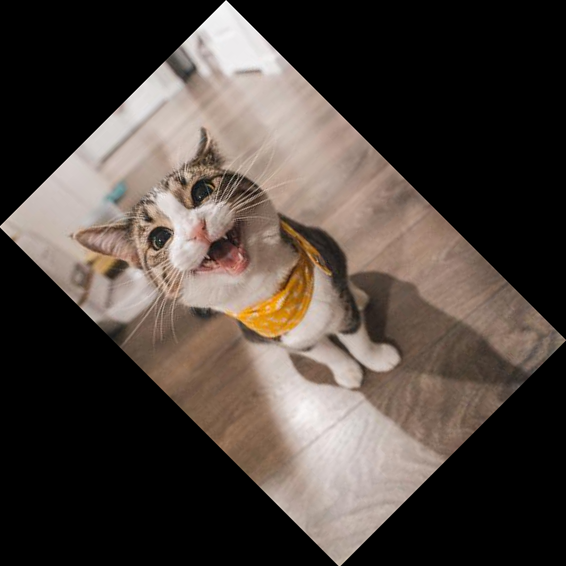

In [5]:
result = rotate_image(
    np.asarray(image),
    x_rotation=0,
    y_rotation=0,
    z_rotation=45,
)
print("z_rotation=45")
display(Image.fromarray(result))

result = rotate_image(
    np.asarray(image),
    x_rotation=0,
    y_rotation=0,
    z_rotation=-45,
)
print("z_rotation=-45")
display(Image.fromarray(result))

Combined Rotation:

x_rotation=45, y_rotation=45, z_rotation=45


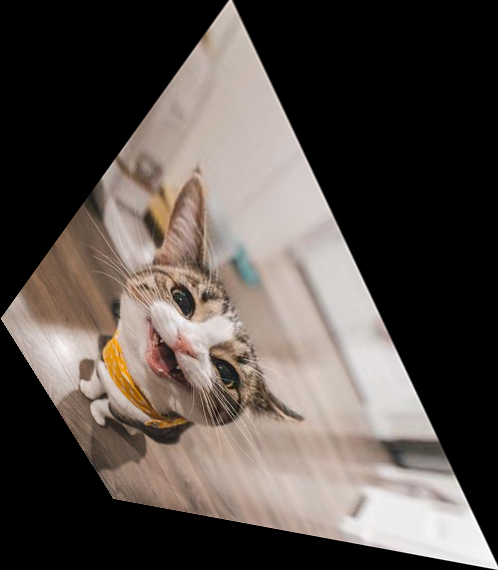

x_rotation=-45, y_rotation=-45, z_rotation=-45


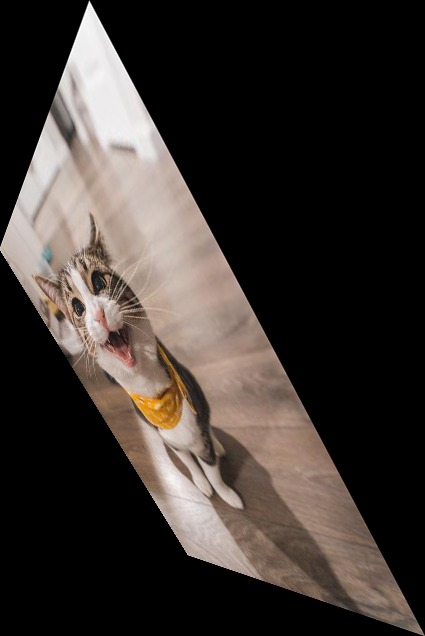

In [6]:
result = rotate_image(
    np.asarray(image),
    x_rotation=45,
    y_rotation=45,
    z_rotation=45,
)
print("x_rotation=45, y_rotation=45, z_rotation=45")
display(Image.fromarray(result))

result = rotate_image(
    np.asarray(image),
    x_rotation=-45,
    y_rotation=-45,
    z_rotation=-45,
)
print("x_rotation=-45, y_rotation=-45, z_rotation=-45")
display(Image.fromarray(result))

## Transformation Matrix & Point Rotation

In [7]:
from xyzrotation import transform_points, get_transform_matrix, transform_image, ImageSize
from matplotlib import pyplot as plt

points.shape=(4, 2)
points.tolist()=[[292, 299], [270, 211], [82, 243], [221, 191]]


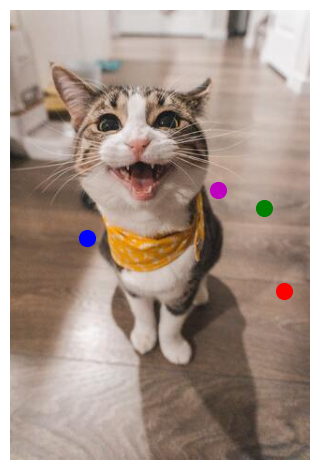

In [8]:
# genrate 4 random points
x = np.random.randint(0, image.size[0], 4)
y = np.random.randint(0, image.size[1], 4)
points = np.array([x, y]).T
print(f"{points.shape=}")
print(f"{points.tolist()=}")

plt.imshow(image)
colors = ["r", "g", "b", "m"]
for i, (x, y) in enumerate(points):
    plt.scatter(x, y, c=colors[i], s=128)
plt.axis("off")
plt.tight_layout()
plt.show()

transform_matrix.shape=(3, 3)


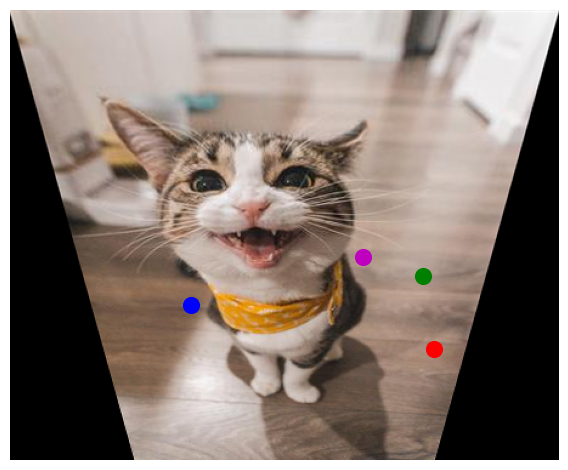

In [9]:
original_image_size = ImageSize(height=image.size[1], width=image.size[0])
transform_matrix, new_image_size = get_transform_matrix(
    original_image_size,
    x_rotation=45,
    y_rotation=0,
    z_rotation=0,
    x_translate=0,
    y_translate=0,
)
print(f"{transform_matrix.shape=}")
transformed_points = transform_points(points, transform_matrix)
transformed_image = transform_image(np.asarray(image), transform_matrix, new_image_size)
plt.imshow(transformed_image)
# scatter the points each with a different color
colors = ["r", "g", "b", "m"]
for i, (x, y) in enumerate(transformed_points):
    plt.scatter(x, y, c=colors[i], s=128)
plt.axis("off")
plt.tight_layout()
plt.show()

To get the corners of the rotated image:

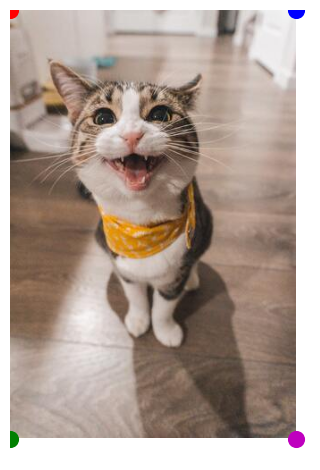

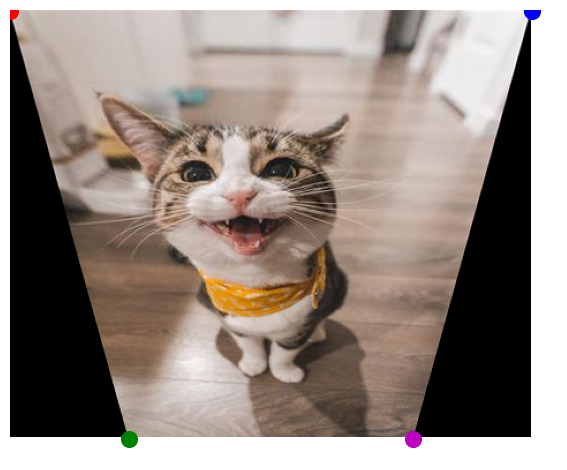

In [10]:
corners = np.array(
    [
        [0, 0],
        [0, original_image_size.height],
        [original_image_size.width, 0],
        [original_image_size.width, original_image_size.height],
    ]
)

plt.imshow(image)
colors = ["r", "g", "b", "m"]
for i, (x, y) in enumerate(corners):
    plt.scatter(x, y, c=colors[i], s=128)
plt.axis("off")
plt.tight_layout()
plt.show()

transformed_corners = transform_points(corners, transform_matrix)
plt.imshow(transformed_image)
colors = ["r", "g", "b", "m"]
for i, (x, y) in enumerate(transformed_corners):
    plt.scatter(x, y, c=colors[i], s=128)
plt.axis("off")
plt.tight_layout()
plt.show()